In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pylab import rcParams

In [19]:
def ImageHandFingerDetect(image):
    
    image = cv2.resize(image, (int(image.shape[1]/4), int(image.shape[0]/4)))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    ret, threshold1 = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    contours, hierarchy = cv2.findContours(threshold1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    drawing = np.zeros(image.shape, np.uint8)
    
    max_area=0
  
    for i in range(len(contours)):
        cnt=contours[i]
        area = cv2.contourArea(cnt)
        if (area>max_area):
            max_area=area
            ci=i
    cnt=contours[ci]
    hull = cv2.convexHull(cnt)
    moments = cv2.moments(cnt)
    if moments['m00']!=0:
        cx = int(moments['m10']/moments['m00']) # cx = M10/M00
        cy = int(moments['m01']/moments['m00']) # cy = M01/M00
    
    centr=(cx,cy)
    cv2.circle(image,centr,5,[0,0,255],2)
    cv2.drawContours(drawing,[cnt],0,(0,255,0),2)
    cv2.drawContours(drawing,[hull],0,(0,0,255),2)
    
    cnt = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    hull = cv2.convexHull(cnt,returnPoints = False)
    
    if (1):
        defects = cv2.convexityDefects(cnt,hull)
        mind=0
        maxd=0
        for i in range(defects.shape[0]):
            s,e,f,d = defects[i,0]
            start = tuple(cnt[s][0])
            end = tuple(cnt[e][0])
            far = tuple(cnt[f][0])
            dist = cv2.pointPolygonTest(cnt,centr,True)
            cv2.line(image,start,end,[0,0,255],5)
            
            cv2.circle(image,far,10,[0,0,255],-1)
            font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(image, "Number of Fingers: "+str(i), ( 26, 106), font, 1, (0, 0, 255), 2)
        i=0
        return (image)

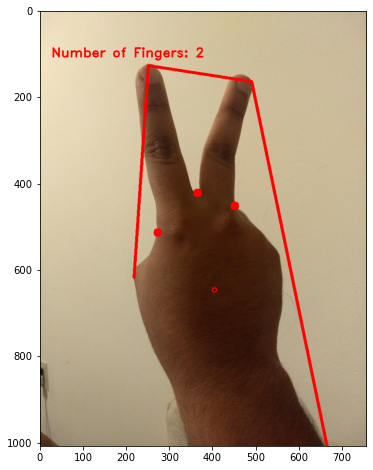

In [20]:
image_1 = cv2.imread("image3.jpg")
output = ImageHandFingerDetect(image_1)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
rcParams['figure.figsize'] = 10, 8
plt.imshow(output, cmap='bwr')